In [1]:
#3.4 주식 비교하기
##3.4.1 야후 파이낸스로 주식 시세 구하기

##!pip install yfinance
##!pip install pandas-datareader

In [2]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

C:\Users\user\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
sec = pdr.get_data_yahoo('005930.KS', start = '2018-05-04') ###삼성전자
msft = pdr.get_data_yahoo('MSFT', start = '2018-05-04') ###마이크로소프트

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
print(sec)

               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2018-05-04  53000.0  53900.0  51800.0  51900.0  46826.652344  39565391
2018-05-08  52600.0  53200.0  51900.0  52600.0  47458.222656  23104720
2018-05-09  52600.0  52800.0  50900.0  50900.0  45924.394531  16128305
2018-05-10  51700.0  51700.0  50600.0  51600.0  46555.972656  13905263
2018-05-11  52000.0  52200.0  51200.0  51300.0  46285.292969  10314997
...             ...      ...      ...      ...           ...       ...
2021-05-10  82300.0  83500.0  81800.0  83200.0  83200.000000  19385027
2021-05-11  82500.0  82600.0  81100.0  81200.0  81200.000000  28996680
2021-05-12  80800.0  81200.0  79800.0  80000.0  80000.000000  35812268
2021-05-13  78900.0  79600.0  78400.0  78500.0  78500.000000  31490096
2021-05-14  79000.0  80300.0  78900.0  80100.0  80100.000000  16450920

[743 rows x 6 columns]


In [5]:
tmp_msft = msft.drop(columns = 'Volume')
tmp_msft.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2021-05-10,250.869995,251.729996,247.119995,247.179993,247.179993
2021-05-11,244.550003,246.600006,242.570007,246.229996,246.229996
2021-05-12,242.169998,244.380005,238.070007,239.000000,239.000000
2021-05-13,241.800003,245.600006,241.419998,243.029999,243.029999
2021-05-14,245.580002,249.179993,245.490005,248.149994,248.149994


In [6]:
print(sec.index)
print(sec.columns)

DatetimeIndex(['2018-05-04', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18',
               ...
               '2021-04-30', '2021-05-03', '2021-05-04', '2021-05-06',
               '2021-05-07', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14'],
              dtype='datetime64[ns]', name='Date', length=743, freq=None)
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


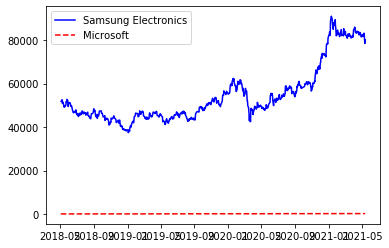

In [7]:
###삼성전자와 마이크로소프트의 종가 데이터를 이용해 그래프 출력

import matplotlib.pyplot as plt

plt.plot(sec.index, sec.Close, 'b', label = 'Samsung Electronics')
plt.plot(msft.index, msft.Close, 'r--', label = 'Microsoft')
plt.legend(loc = 'best')
plt.show()

In [8]:
##3.4.2 일간 변동률로 주가 비교하기
print(type(sec['Close']))

print(sec['Close'])

<class 'pandas.core.series.Series'>
Date
2018-05-04    51900.0
2018-05-08    52600.0
2018-05-09    50900.0
2018-05-10    51600.0
2018-05-11    51300.0
               ...   
2021-05-10    83200.0
2021-05-11    81200.0
2021-05-12    80000.0
2021-05-13    78500.0
2021-05-14    80100.0
Name: Close, Length: 743, dtype: float64


In [9]:
sec['Close'].shift(1)

Date
2018-05-04        NaN
2018-05-08    51900.0
2018-05-09    52600.0
2018-05-10    50900.0
2018-05-11    51600.0
               ...   
2021-05-10    81900.0
2021-05-11    83200.0
2021-05-12    81200.0
2021-05-13    80000.0
2021-05-14    78500.0
Name: Close, Length: 743, dtype: float64

In [10]:
sec_dpc = (sec['Close'] / sec['Close'].shift(1) - 1) * 100
sec_dpc.head()

Date
2018-05-04         NaN
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

In [11]:
sec_dpc.iloc[0] = 0 ###첫 번째 일간 변동률의 값이 Nan으로 향후 계산을 위해 NaN을 0으로 변경할 필요가 있다
sec_dpc.head()

Date
2018-05-04    0.000000
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

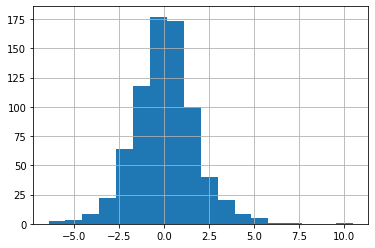

In [12]:
##3.4.3 주가 일간 변동률 히스토그램
plt.hist(sec_dpc, bins = 18)
plt.grid(True)
plt.show()

In [13]:
sec_dpc.describe()

count    743.000000
mean       0.073504
std        1.741998
min       -6.387665
25%       -0.992720
50%        0.000000
75%        1.032110
max       10.470588
Name: Close, dtype: float64

In [14]:
sec_dpc_cs = sec_dpc.cumsum() ###일간 변동률의 누적합을 구한다
print(sec_dpc_cs)

Date
2018-05-04     0.000000
2018-05-08     1.348748
2018-05-09    -1.883192
2018-05-10    -0.507946
2018-05-11    -1.089341
                ...    
2021-05-10    58.332004
2021-05-11    55.928158
2021-05-12    54.450326
2021-05-13    52.575326
2021-05-14    54.613542
Name: Close, Length: 743, dtype: float64


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


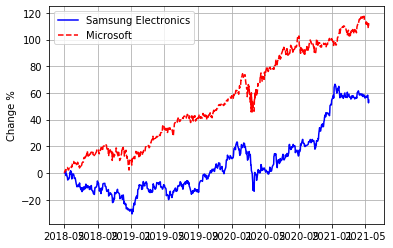

In [15]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start = '2018-05-04')
sec_dpc = (sec['Close'] - sec['Close'].shift(1)) / sec['Close'].shift(1) * 100
sec_dpc.iloc[0] = 0
sec_dpc_cs = sec_dpc.cumsum()

msft = pdr.get_data_yahoo('MSFT', start = '2018-05-04')
msft_dpc = (msft['Close'] - msft['Close'].shift(1)) / msft['Close'].shift(1) * 100
msft_dpc.iloc[0] = 0
msft_dpc_cs = msft_dpc.cumsum()


import matplotlib.pyplot as plt
plt.plot(sec.index, sec_dpc_cs, 'b', label = 'Samsung Electronics')
plt.plot(msft.index, msft_dpc_cs, 'r--', label = 'Microsoft')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc = 'best')
plt.show()

[*********************100%***********************]  1 of 1 completed


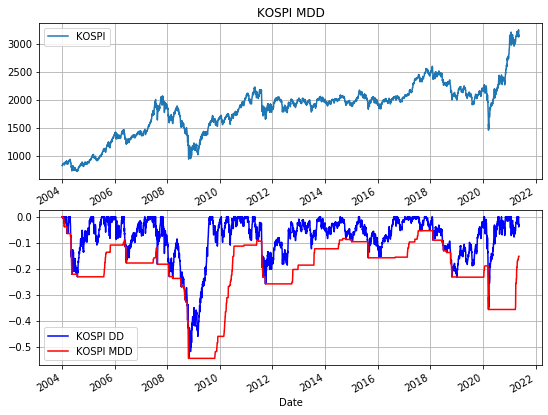

In [16]:
#3.5 최대 손실 낙폭
##3.5.1 KOSPI의 MDD
##3.5.2 서브프라임 당시의 MDD
###MDD(Maximum Drawdown, 최대 손실 낙폭)은 특정 기간에 발생한 최고점에서 최저점까지의 가장 큰 손실을 의미한다
###퀀트 투자에서는 수익률을 높이는 것보다 MDD를 낮추는 것이 더 낫다고 할 만큼 중요한 지표로서, 특정 기간 동안 최대한 얼마의 손실이 날 수 있는지를 나타낸다

kospi = pdr.get_data_yahoo('^KS11', '2004-01-04')
window = 252 ###산정 기간에 해당하는 window값은 1년 동안의 개장일을 252일로 어림잡아 설정했다
peak = kospi['Adj Close'].rolling(window, min_periods = 1).max() ###KOSPI 종가 칼럼에서 1년(거래일 기준) 기간 단위로 최고치 peak를 구한다
drawdown = kospi['Adj Close']/peak - 1.0 ###drawdown은 최고치(peak) 대비 현재 KOSPI 종가가 얼마나 하락했는지를 구한다
max_dd = drawdown.rolling(window, min_periods = 1).min() ###drawdown에서 1년 기간 단위로 최저치 max_dd를 구하며, 마이너스값이기 때문에 최저치가 바로 최대 손실 낙폭이 된다

plt.figure(figsize = (9,7))
plt.subplot(211) ###2행 1열 중 1행에 그린다
kospi['Close'].plot(label = 'KOSPI', title = 'KOSPI MDD', grid = True, legend = True)
plt.subplot(212) ###2행 1열 중 2행에 그린다
drawdown.plot(c = 'blue', label = 'KOSPI DD', grid = True, legend = True)
max_dd.plot(c = 'red', label = 'KOSPI MDD', grid = True, legend = True )
plt.show()

In [17]:
###서브프라임 금융 위기 당시였던 2008년 10월 24일에 KOSPI 지수가 10.57% 하락하면서 MDD가 -54.5%를 기록했다
###MDD를 기록한 기간을 구하려면 다음과 같이 인덱싱 조건을 적용하면 된다

max_dd.min()
max_dd[max_dd == -0.5453665130144085]

Date
2008-10-24   -0.545367
2008-10-27   -0.545367
2008-10-28   -0.545367
2008-10-29   -0.545367
2008-10-30   -0.545367
                ...   
2009-10-16   -0.545367
2009-10-19   -0.545367
2009-10-20   -0.545367
2009-10-21   -0.545367
2009-10-22   -0.545367
Name: Adj Close, Length: 252, dtype: float64

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


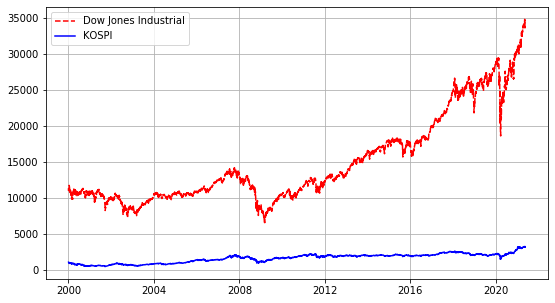

In [18]:
#3.6 회귀분석과 상관관계
##3.6.1 KOSPI와 다우존스 지수 비교

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

plt.figure(figsize = (9,5))
plt.plot(dow.index, dow.Close, 'r--', label = 'Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close, 'b', label = 'KOSPI')
plt.grid(True)
plt.legend(loc = 'best')
plt.show()

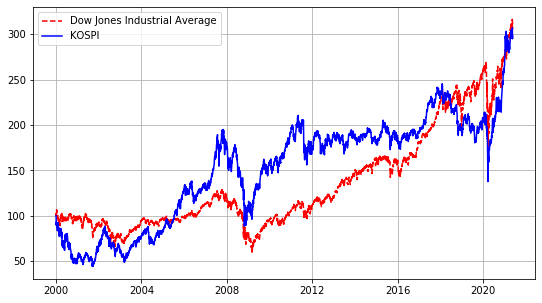

In [19]:
##3.6.2 지수화 비교
###일별 종가만으로는 KOSPI와 다우존스 지수의 상관관계를 비교하기가 어려웠다
###이번에는 현재 종가를 특정 시점의 종가로 나누어 변동률을 구해보자
###오늘 종가를 2000년 1월 4일 종가로 나눈 뒤 100을 곱하면, 2000년 1월 4일 종가 대비 오늘의 변동률을 구할 수 있다
###이를 지수화(indexation)라고 하며, 일간 변동률의 누적합을 구하는 것보다 더 수월하게 처리할 수 있다
###지수화를 하고 나니, 지난 20년간 KOSPI의 상승률이 다우존스 지수의 상승률과 엇비슷했음을 확인할 수 있다

d = (dow.Close / dow.Close.loc['2000-01-04']) * 100
k = (kospi.Close / kospi.Close.loc['2000-01-04']) * 100

plt.figure(figsize = (9,5))
plt.plot(d.index, d, 'r--', label = 'Dow Jones Industrial Average')
plt.plot(k.index, k, 'b', label = 'KOSPI')
plt.grid(True)
plt.legend(loc = 'best')
plt.show()

5376
5268


ValueError: x and y must be the same size

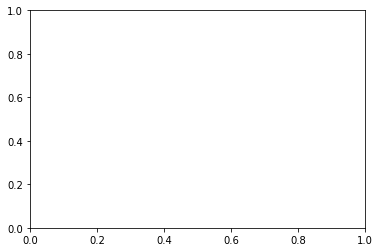

In [20]:
##3.6.3 산점도 분석
print(len(dow));
print(len(kospi));

plt.scatter(dow, kospi, marker = '.')
###다우존스 지수 데이터 개수와 KOSPI 지수 데이터 개수를 len() 함수로 출력해보면 데이터 개수가 다르다
###산점도를 그리려면 x, y의 사이즈가 동일해야 한다

In [21]:
import pandas as pd
df = pd.DataFrame({'DOW' : dow['Close'], 'KOSPI' : kospi['Close']})
df

###다우존스 지수의 종가 칼럼과 KOSPI 지수의 종가 칼럼을 합쳐서 데이터프레임 df를 생성하자
###한 쪽에 데이터가 없으면 값이 없다는 의미의 NaN을 자동적으로 채워주기 떄문에 전체 데이터 개수가 둘 다 5537개로 늘었다

df = df.fillna(method = 'bfill')
df
###데이터프레임의 fillna() 함수를 사용하여 NaN을 채울 수 있는데, 인수로 bfill(backward fill)을 주면 NaN 뒤에 있는 값으로 NaN을 덮어쓴다
###공교롭게도 데이터프레임의 마지막 행에 NaN이 이으면 bfill 방식으로는 모든 NaN을 없앨 수 없다
###그럴 때에는 ffill(forward fill) 방식으로 fillna() 함수를 한 번 더 호출함으로써 제일 마지막 행의 이전 행에 있던 값으로 NaN을 덮어쓸 수 있다
###한편 dropna() 함수를 사용해 NaN이 있는 행을 한 번에 모두 제거하는 방법도 있다
###하지만 fillna() 함수를 사용했을 때보다 표본 데이터 수가 적어지므로 상황에 맞게 적절히 선택해서 사용하자

,DOW,KOSPI
Date,,
2000-01-03,11357.509766,1059.040039
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
...,...,...
2021-05-10,34742.820312,3249.300049
2021-05-11,34269.160156,3209.429932
2021-05-12,33587.660156,3161.659912


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


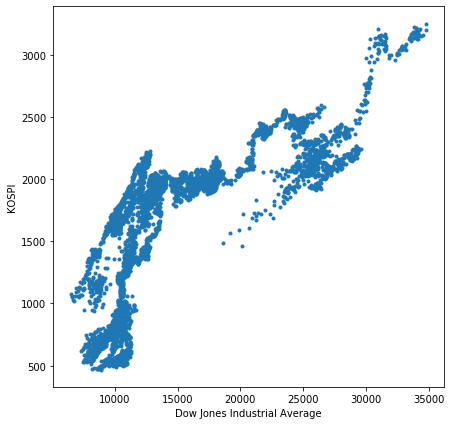

In [22]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt

yf.pdr_override()

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'DOW' : dow['Close'], 'KOSPI' : kospi['Close']})
df = df.fillna(method = 'bfill')
df = df.fillna(method = 'ffill')

plt.figure(figsize = (7,7))
plt.scatter(df['DOW'], df['KOSPI'], marker = '.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

In [23]:
##3.6.4 사이파이 선형 회귀 분석
##3.6.5 선형 회귀 분석

##!pip install scipy

In [24]:
from scipy import stats
regr = stats.linregress(df['DOW'], df['KOSPI'])
regr

LinregressResult(slope=0.0781902458989528, intercept=440.84009604760763, rvalue=0.7846436727338986, pvalue=0.0, stderr=0.0008303030581809127)

In [25]:
df.corr()
df['DOW'].corr(df['KOSPI']) ###df.DOW.corr(df.KOSPI)와 같다

0.7846436727338986

In [26]:
r_value = df['DOW'].corr(df['KOSPI'])
r_value

r_squared = r_value ** 2 ###pow(r_value, 2)와 같다
r_squared

0.6156656931613413

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


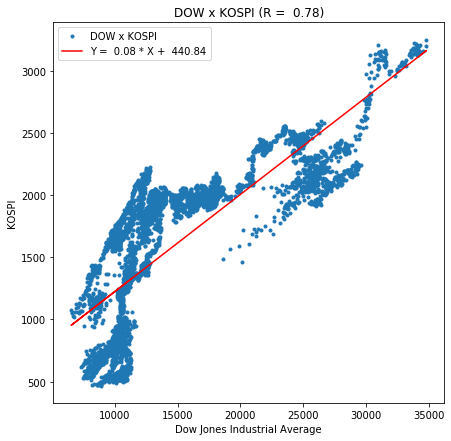

In [27]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from scipy import stats
import matplotlib.pylab as plt

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'X' : dow['Close'], 'Y' : kospi['Close']})
df = df.fillna(method = 'bfill')
df = df.fillna(method = 'ffill')

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope: .2f} * X + {regr.intercept : .2f}'

plt.figure(figsize = (7,7))
plt.plot(df.X, df.Y, '.')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue: .2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

In [28]:
import pandas as pd

krx_list = pd.read_html('C:/Users/user/Desktop/Mydata Unit/파이썬증권데이터분석/상장법인목록.xls')
krx_list[0]

krx_list[0].종목코드 = krx_list[0].종목코드.map('{:06d}'.format)
krx_list[0]

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,에이치피오,357230,기타 식품 제조업,"건강기능식품(유산균, 비타민 등)",2021-05-14,12월,이현용,http://denps.com/kor/,서울특별시
1,SK아이이테크놀로지,361610,일차전지 및 축전지 제조업,2차전지용 습식 분리막 및 폴더블 커버 윈도우,2021-05-11,12월,노재석,http://www.skietechnology.com/,서울특별시
2,하이제6호스팩,377400,금융 지원 서비스업,기업인수합병,2021-05-10,12월,정종석,NaN,서울특별시
3,쿠콘,294570,기타 정보 서비스업,"페이먼트서비스(65.2%), 데이터서비스(29.1%) 등",2021-04-28,12월,김종현,http://www.coocon.net,서울특별시
4,이삭엔지니어링,351330,"컴퓨터 프로그래밍, 시스템 통합 및 관리업",공장자동화 설비제어,2021-04-21,12월,"김창수, 김범수",http://isaac-eng.com,경기도
...,...,...,...,...,...,...,...,...,...
2434,CJ대한통운,000120,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,강신호,http://www.cjlogistics.com,서울특별시
2435,메리츠화재,000060,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시
2436,경방,000050,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
2437,유수홀딩스,000700,회사 본부 및 경영 컨설팅 서비스업,지주사업,1956-03-03,12월,송영규,http://www.eusu-holdings.com,서울특별시


In [29]:
##!pip install html5lib
##!pip install lxml
##!pip install --upgrade mplfinance

In [30]:
import requests
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt

code = '068270'
url = f'https://finance.naver.com/item/sise_day.nhn?code={code}'
req = requests.get(url, headers = {'User-agent' : 'Mozilla/5.0'})
html = BeautifulSoup(req.text, 'lxml')

pgrr = html.find('td', class_= 'pgRR')
s = str(pgrr.a['href']).split('=')
last_page = s[-1]

print(last_page)

392


네이버 증권 일별 시세의 웹페이지가 변경되어 기존의 방법으로는 불러올 수 없습니다.

일별 시세 페이지에서 브라우저가 아닐 때 응답을 하지 않기 때문인데 이 때 requests 라는 라이브러리를 통해 HTTP 요청을 보내고 웹사이트의 소스코드를 받아와서 table 태그를 찾는 방법으로 받아올 수 있습니다.

아래의 코드를 보면 requests를 통해 HTTP 통신을 보내고 beautifulsoup을 통해 HTML 페이지 내에서 table 태그를 찾습니다.

table 태그를 read_html로 불러오면 판다스의 데이터프레임으로 읽어올 수 있습니다.

In [31]:
def get_day_list(item_code, page_no):


    url = f"https://finance.naver.com/item/sise_day.nhn?code={item_code}&page={page_no}"
    headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'}
    response = requests.get(url, headers=headers)
    html = BeautifulSoup(response.text, "lxml")

    table = html.select("table")
    table = pd.read_html(str(table))
    df_day = table[0].dropna()
    return df_day


In [32]:
df = pd.DataFrame()

for page in range(1, int(last_page)+1) :
    df = df.append(get_day_list(code, page))   
    
df

,날짜,종가,전일비,시가,고가,저가,거래량
1,2021.05.14,270500.0,5500.0,265000.0,271500.0,261500.0,565243.0
2,2021.05.13,265000.0,2500.0,260500.0,270500.0,260000.0,862168.0
3,2021.05.12,262500.0,8000.0,270500.0,274500.0,261500.0,771734.0
4,2021.05.11,270500.0,4500.0,273500.0,276500.0,266500.0,690113.0
5,2021.05.10,275000.0,8500.0,276500.0,277500.0,269000.0,961271.0
...,...,...,...,...,...,...,...
13,2005.07.25,5650.0,70.0,5500.0,5950.0,5500.0,61036.0
1,2005.07.22,5580.0,160.0,5850.0,5850.0,5530.0,69921.0
2,2005.07.21,5740.0,810.0,6450.0,6580.0,5730.0,182685.0
3,2005.07.20,6550.0,1150.0,7690.0,7690.0,6550.0,422688.0


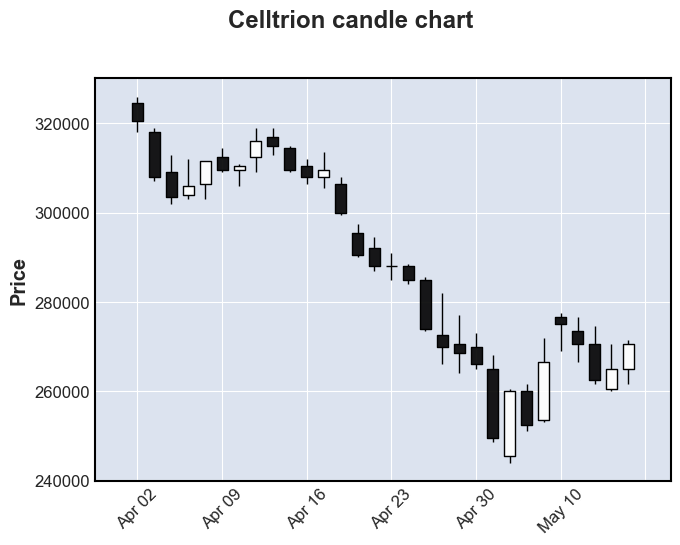

In [33]:
##4.4.3 셀트리온 캔들 차트
import mplfinance as mpf

df1 = df.iloc[0:30]
df1 = df1.rename(columns = {'날짜' : 'Date', '시가' : 'Open', '고가' : 'High', '저가' : 'Low', '종가' : 'Close', '거래량' : 'Volume'})

df1 = df1.sort_values(by = 'Date')
df1.index = pd.to_datetime(df1.Date)
df1 = df1[['Open', 'High', 'Low', 'Close', 'Volume']]

mpf.plot(df1, title = 'Celltrion candle chart', type = 'candle')
##mpf.plot(df1, title = 'Celltrion candle chart', type = 'ohlc')

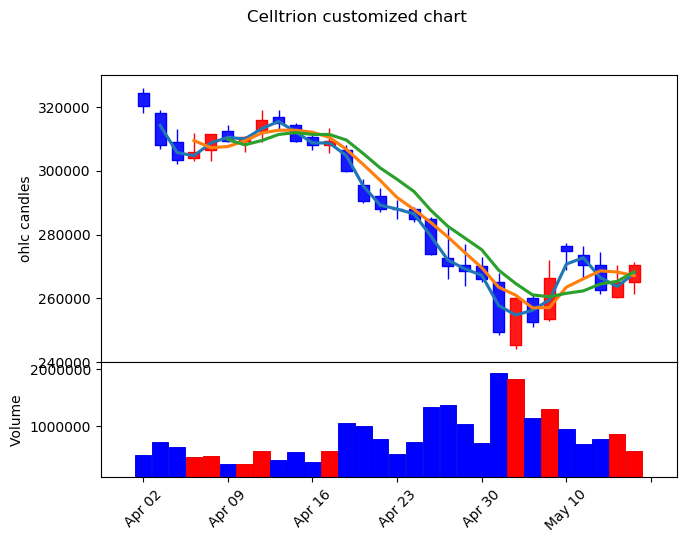

In [34]:
kwargs = dict(title = 'Celltrion customized chart', type = 'candle', mav = (2,4,6), volume = True, ylabel = 'ohlc candles')
mc = mpf.make_marketcolors(up = 'r', down = 'b', inherit = True)
s = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df1, **kwargs, style = s)

maria DB 경로
C:\Program Files\MariaDB 10.5 \

In [35]:
##!pip install pymysql

In [36]:
import pymysql

connection = pymysql.connect(host = 'localhost', port = 3306, db = 'investar', user = 'root', passwd = 'qhal4142!?', autocommit = True)

cursor = connection.cursor()
cursor.execute("SELECT VERSION();")
result = cursor.fetchone()

print("MariaDB version : {}".format(result))

connection.close()

MariaDB version : ('10.5.10-MariaDB',)
